<a href="https://colab.research.google.com/github/OliveiraGmo/Machine-learning/blob/main/Recomenda%C3%A7%C3%A3o_de_imagens_sem_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import os
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
# Função para calcular o histograma de cores de uma imagem
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [6]:
# Carregar todas as imagens de um diretório e extrair histogramas
def load_images_and_extract_histograms(folder):
    images = []
    filenames = []
    histograms = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
            hist = extract_color_histogram(img)
            histograms.append(hist)
    return filenames, histograms

In [7]:
# Diretório contendo as imagens
folder = "/content/drive/MyDrive/images"
filenames, histograms = load_images_and_extract_histograms(folder)

In [8]:
def find_similar_images(query_hist, histograms, filenames, top_n=5):
    # Calcula a distância Euclidiana entre o histograma da consulta e todos os outros
    distances = euclidean_distances([query_hist], histograms)[0]
    # Ordena as distâncias e obtém os índices das imagens mais próximas
    sorted_indices = np.argsort(distances)
    # Retorna os nomes das imagens mais similares
    return [filenames[i] for i in sorted_indices[:top_n]]

In [12]:
# Caminho da imagem de consulta
query_image_path = "/content/Cortes-de-cabelo-curto-moderno.jpg"

# Carregar a imagem de consulta e extrair seu histograma
query_image = cv2.imread(query_image_path)
query_hist = extract_color_histogram(query_image)

# Encontrar as imagens mais semelhantes
similar_images = find_similar_images(query_hist, histograms, filenames, top_n=5)

print("Imagens mais semelhantes:", similar_images)

Imagens mais semelhantes: ['cacheados(16).jpeg', 'muito_curto (7).jpeg', 'franjas (20).jpeg', 'muito_curto (14).jpeg', 'franjas (13).jpeg']


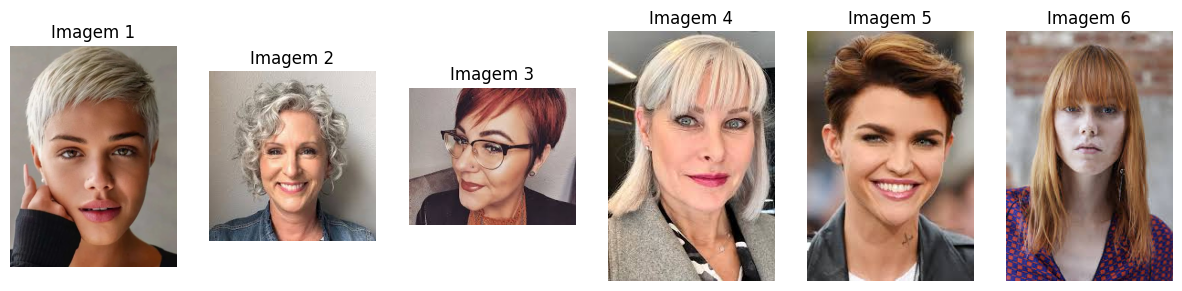

In [13]:
import matplotlib.pyplot as plt

# Função para exibir imagens
def show_images(image_paths, folder):
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(image_paths):
        img = cv2.imread(os.path.join(folder, path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB para exibição
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img)
        plt.title(f"Imagem {i + 1}")
        plt.axis("off")
    plt.show()

# Exibir a imagem de consulta e as imagens recomendadas
show_images([query_image_path] + similar_images, folder)